In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')




In [172]:
abd=pd.read_csv('abalone.csv')
abd

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [173]:
abd.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [174]:
abd.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [175]:
abd.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


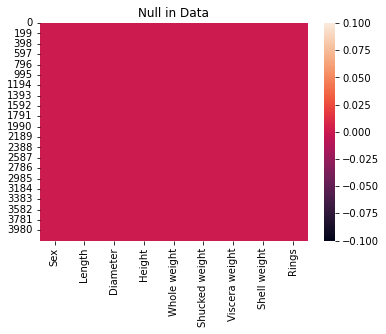

In [176]:
sns.heatmap(abd.isnull())
plt.title('Null in Data')
plt.show()

This indicates that there are no null values in the dataset

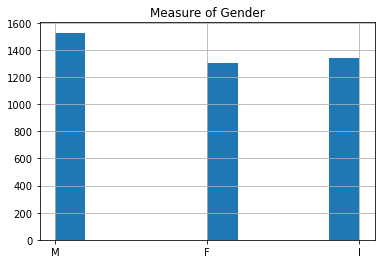

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [184]:
abd['Sex'].hist()
plt.title('Measure of Gender')
plt.show()

abd['Sex'].value_counts()

In [185]:
from sklearn.preprocessing import LabelEncoder

In [187]:
LE=LabelEncoder()
abd['Sex']=LE.fit_transform(abd['Sex'])
                            

In [189]:
abd['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [191]:
LE.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

This indicates the new labels for the objects;
F=0
I=1
M=2

In [192]:
abd.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


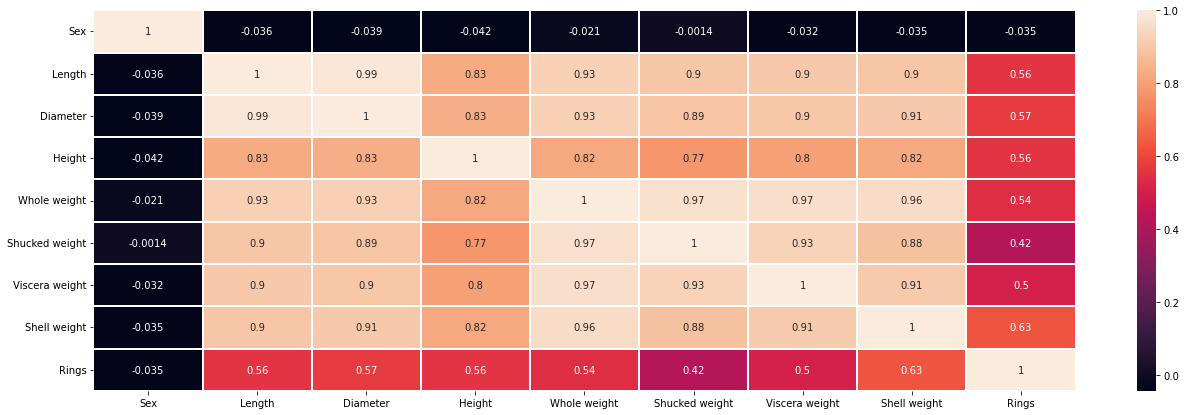

In [196]:
plt.figure(figsize=(22,7))
sns.heatmap(abd.corr(),annot=True,linecolor='white',linewidth=0.2)
plt.show()

In [199]:
corr_matrix=abd.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

It could be observed that the dataset correlated negatively with only Sex

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

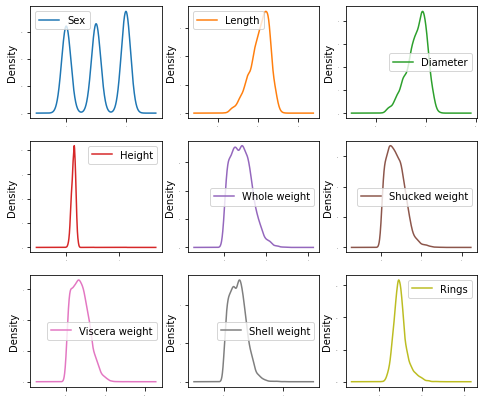

In [209]:
abd.plot(kind='density',subplots=True,sharex=False,layout=(3,3),legend=True,fontsize=False,figsize=(8,7))

In [210]:
x=abd.iloc[:,:-1]
y=abd.iloc[:,-1]

In [211]:
x.shape

(4177, 8)

In [212]:
y.shape

(4177,)

In [213]:
x.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3031,1,0.525,0.400,0.110,0.6275,0.3015,0.1260,0.180
2922,2,0.600,0.465,0.165,1.0475,0.4650,0.2345,0.315
795,2,0.515,0.405,0.145,0.6950,0.2150,0.1635,0.234
605,1,0.425,0.345,0.125,0.4250,0.1600,0.0795,0.154
3160,1,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035


In [214]:
y.sample(5)

346      9
4166    10
4136     9
72      20
2296    13
Name: Rings, dtype: int64

In [215]:
x.skew().sort_values(ascending=False)

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

The above gives an indication of skewness in the dataset which needs to be corrected

In [216]:
from sklearn.preprocessing import power_transform

In [331]:
x_new=power_transform(x)
x_new

array([[ 1.1712026 , -0.69561029, -0.56398319, ..., -0.54059675,
        -0.69095795, -0.58939212],
       [ 1.1712026 , -1.37742861, -1.36858188, ..., -1.31211875,
        -1.33725604, -1.33026688],
       [-1.25695284, -0.0919264 , -0.01309949, ..., -0.36561256,
        -0.25029396, -0.10091812],
       ...,
       [ 1.1712026 ,  0.58131766,  0.63447644, ...,  0.83827367,
         1.01514962,  0.59682925],
       [-1.25695284,  0.85000545,  0.76337986, ...,  0.8588544 ,
         0.81661998,  0.51731383],
       [ 1.1712026 ,  1.88226412,  1.76789423, ...,  2.10188292,
         1.60364168,  1.6628468 ]])

In [332]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

Height            0.376889
Shell weight      0.033534
Whole weight      0.027141
Shucked weight    0.025172
Viscera weight    0.021825
Diameter          0.019786
Length            0.018972
Sex              -0.034129
dtype: float64

In [338]:
type(x_new)

numpy.ndarray

The level of skewness has been reduced after the transformation

In [392]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.171203,-0.695610,-0.563983,-1.115329,-0.582049,-0.540597,-0.690958,-0.589392
1,1.171203,-1.377429,-1.368582,-1.243539,-1.344626,-1.312119,-1.337256,-1.330267
2,-1.256953,-0.091926,-0.013099,-0.104879,-0.206340,-0.365613,-0.250294,-0.100918
3,1.171203,-0.803813,-0.563983,-0.356218,-0.577229,-0.591318,-0.544410,-0.546659
4,-0.109359,-1.488820,-1.437168,-1.502000,-1.404737,-1.380757,-1.457606,-1.482365
...,...,...,...,...,...,...,...,...
4172,-1.256953,0.230405,0.327423,0.650691,0.233918,0.194736,0.642453,0.190442
4173,1.171203,0.478087,0.210572,-0.104879,0.388706,0.495880,0.437681,0.272777
4174,1.171203,0.581318,0.634476,1.634148,0.775215,0.838274,1.015150,0.596829
4175,-1.256953,0.850005,0.763380,0.273371,0.629273,0.858854,0.816620,0.517314


In [410]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.171203,-0.695610,-0.563983,-1.115329,-0.582049,-0.540597,-0.690958,-0.589392
1,1.171203,-1.377429,-1.368582,-1.243539,-1.344626,-1.312119,-1.337256,-1.330267
2,-1.256953,-0.091926,-0.013099,-0.104879,-0.206340,-0.365613,-0.250294,-0.100918
3,1.171203,-0.803813,-0.563983,-0.356218,-0.577229,-0.591318,-0.544410,-0.546659
4,-0.109359,-1.488820,-1.437168,-1.502000,-1.404737,-1.380757,-1.457606,-1.482365
...,...,...,...,...,...,...,...,...
4172,-1.256953,0.230405,0.327423,0.650691,0.233918,0.194736,0.642453,0.190442
4173,1.171203,0.478087,0.210572,-0.104879,0.388706,0.495880,0.437681,0.272777
4174,1.171203,0.581318,0.634476,1.634148,0.775215,0.838274,1.015150,0.596829
4175,-1.256953,0.850005,0.763380,0.273371,0.629273,0.858854,0.816620,0.517314


<function matplotlib.pyplot.show(close=None, block=None)>

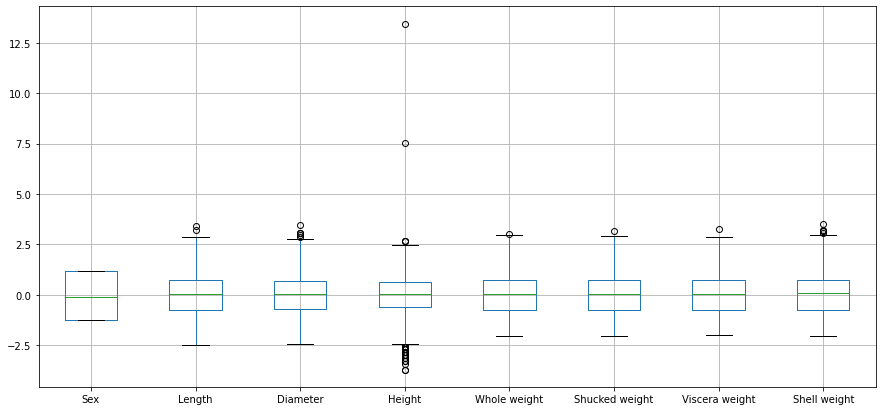

In [340]:
x.iloc[:,:].boxplot(figsize=(15,7))
plt.subplots
plt.show

There are indication of outliers in the data which needs to be corrected

In [341]:
from scipy.stats import zscore

In [342]:
np.abs(zscore(x)<3).all().all()

#this confirms the presence of outliers in the dataset

False

In [346]:
z=np.abs(zscore(abd))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [347]:
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [355]:
len(np.where(z>3)[0])

200

In [356]:
new_abd=abd[(z<3).all(axis=1)]
new_abd

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [357]:
new_abd.shape

(4027, 9)

In [358]:
print('Old abd: ',abd.shape)
print('New abd: ',new_abd.shape)
print('Total dropped: ',abd.shape[0]-new_abd.shape[0])

Old abd:  (4177, 9)
New abd:  (4027, 9)
Total dropped:  150


In [359]:
x=new_abd.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [360]:
y=new_abd.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [361]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [362]:
x_train.shape

(3221, 8)

In [363]:
x_test.shape

(806, 8)

In [364]:
y_train.shape

(3221,)

In [365]:
y_test.shape

(806,)

In [366]:
lr=LogisticRegression()
lr

LogisticRegression()

In [367]:
lr.fit(x_train,y_train)

LogisticRegression()

In [368]:
prdlr=lr.predict(x_test)
prdlr

array([ 7, 10, 11,  8, 10,  8,  7,  8,  8, 11, 10,  9, 10,  9,  7,  8, 11,
        7, 11, 10,  7,  8,  8,  8, 10,  9,  9,  6, 11, 10,  8,  8,  9,  8,
        6,  8,  9, 11,  9,  8,  8, 10, 10,  8,  7,  6,  9,  8,  8,  9, 10,
        8, 10, 10, 10,  6,  7,  9,  9,  9, 11,  6,  9, 10,  7,  9,  8,  9,
       10,  9,  8,  7, 11,  7, 10, 10,  9,  6, 10,  9, 11,  8,  8, 10,  9,
       11, 10,  7, 11,  8, 10, 10,  6,  8, 11, 10,  7, 10, 11,  9, 10,  8,
       11, 10,  8, 11, 10, 10, 10,  8, 11,  9,  9, 10, 10, 10,  7,  7,  8,
       10,  9,  7,  9, 10, 10, 10,  7,  9,  9,  8, 10,  8,  9, 10,  8,  6,
       13, 10,  8, 10, 10, 11,  9, 10,  8, 10,  9,  6,  9,  9, 10, 10,  9,
        6,  6, 10, 11,  7,  7,  7,  9, 10,  6,  7, 10, 10, 10,  7,  7,  6,
        9, 11, 10,  8,  8, 10, 10,  8,  8,  7,  8,  9,  7, 11,  9,  9,  8,
        9,  9, 10,  6,  9, 11,  9,  8, 10,  9,  9,  6,  7,  7,  8, 10, 11,
        8,  7,  7, 11,  9, 10,  9,  8,  7, 13,  6, 10, 11,  7,  6,  6, 10,
        9, 10,  7,  9, 11

In [376]:
print('error:')
print('Mean absolute error:', mean_absolute_error(y_test,prdlr))
print('Mean squared error:', mean_squared_error(y_test,prdlr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,prdlr)))

error:
Mean absolute error: 1.6153846153846154
Mean squared error: 5.8535980148883375
Root mean squared error: 2.419421008193559


In [385]:
def age_predict(p):
    p=p.reshape(1,-1)    
    prdlr=lr.predict(p)
    print('The predicted rings is/are:',prdlr)
    if prdlr==prdlr:
        print('The abalone is',prdlr+1.5,'years old')
   

In [386]:
p=np.array([2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500])

age_predict(p)

The predicted rings is/are: [8]
The abalone is [9.5] years old


In [374]:
accuracy_score(y_test,prdlr)

0.2630272952853598

In [389]:
print(confusion_matrix(y_test,prdlr))

[[ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 10  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13 23 12  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 31 27  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 19 42 41  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 32 67 39  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 16 35 40 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 11 24 35 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  2 13 19  8  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  6 17  8  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  6 12  3  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  8  9  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  9  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  4  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  1  0  0  0  0  0  0  0  0]]


In [391]:
print(classification_report(y_test,prdlr))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        22
           6       0.22      0.27      0.24        49
           7       0.30      0.44      0.36        70
           8       0.28      0.38      0.32       112
           9       0.33      0.43      0.37       155
          10       0.20      0.33      0.25       120
          11       0.23      0.19      0.21        93
          12       0.00      0.00      0.00        46
          13       0.25      0.03      0.05        37
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00         5

    accuracy              